### Problem statement
#### Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df_USA=pd.read_csv('/Users/ambigaur/Downloads/US_Accidents_March23.csv')

In [13]:
df_USA.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [15]:
df_USA['Start_Time'] = pd.to_datetime(df_USA['Start_Time'], format="%Y-%m-%d %H:%M:%S",  errors='coerce')
df_USA['End_Time'] = pd.to_datetime(df_USA['End_Time'], format="%Y-%m-%d %H:%M:%S",  errors='coerce')
df_USA['Hour'] = df_USA['Start_Time'].dt.hour

In [16]:
df_USA = df_USA.dropna(subset=['Start_Lat', 'Start_Lng'])

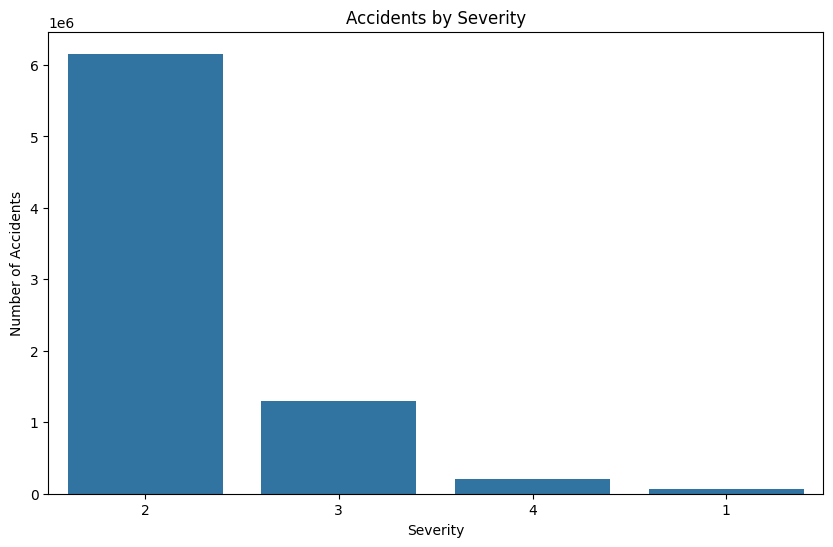

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_USA, x='Severity', order=df_USA['Severity'].value_counts().index)
plt.title('Accidents by Severity')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.show()


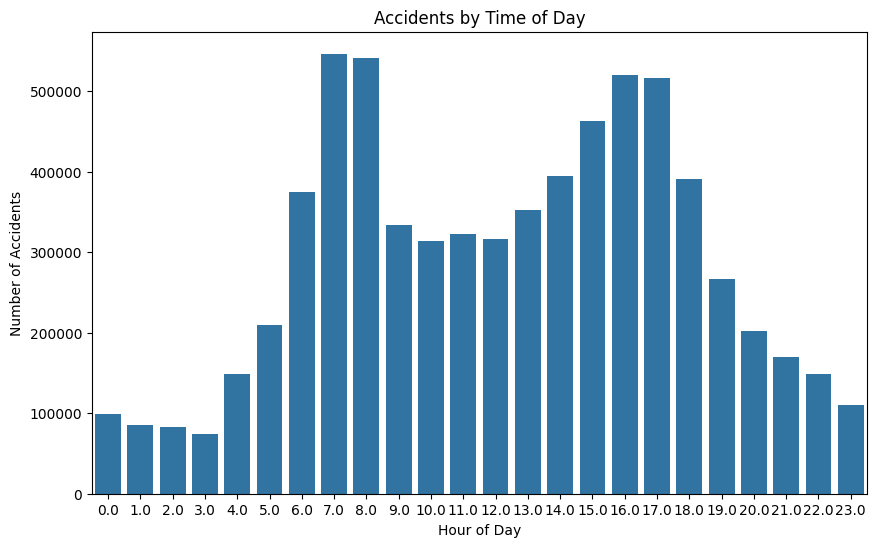

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_USA, x='Hour')
plt.title('Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()


In [19]:
import geopandas as gpd
from shapely.geometry import Point

/var/folders/4p/wr7wrzgx2n974cn269fjsbzr0000gn/T/ipykernel_1540/3933722010.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


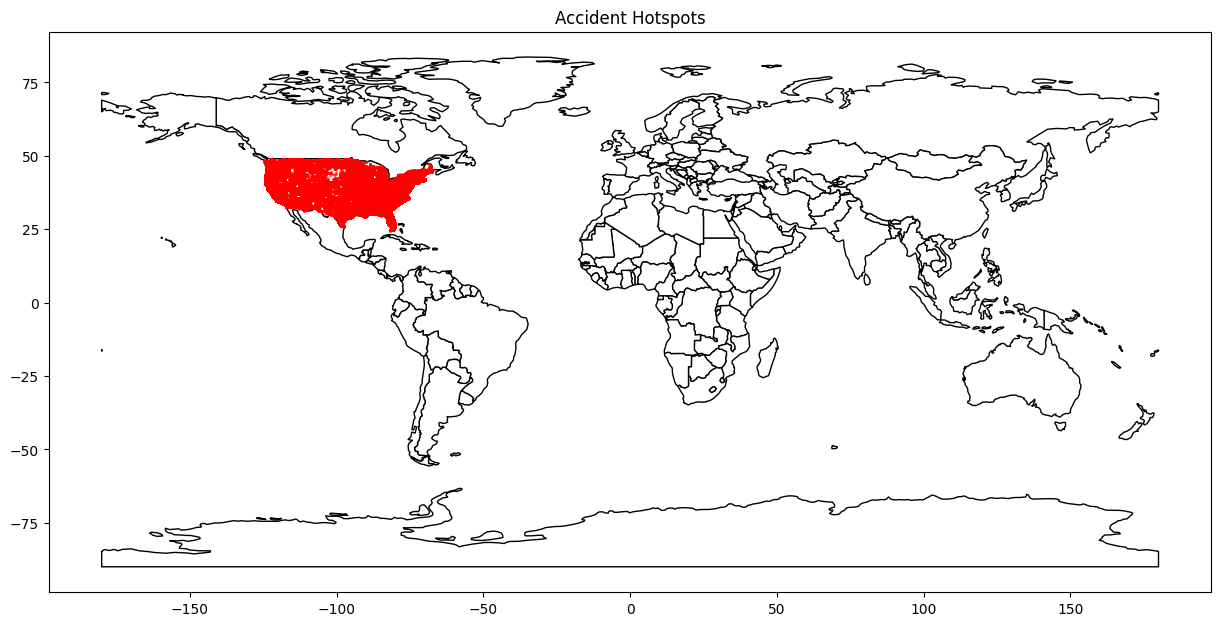

In [21]:
geometry = [Point(xy) for xy in zip(df_USA['Start_Lng'], df_USA['Start_Lat'])]
gdf = gpd.GeoDataFrame(df_USA, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=1, alpha=0.5)
plt.title('Accident Hotspots')
plt.show()

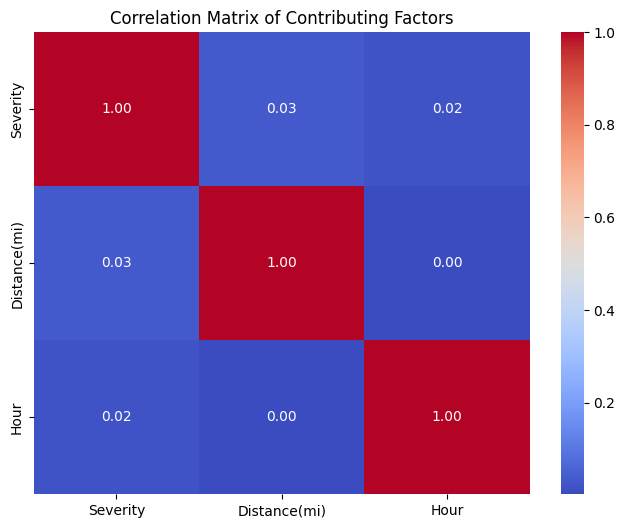

In [24]:
correlation_matrix = df_USA[['Severity', 'Distance(mi)', 'Hour']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Contributing Factors')
plt.show()


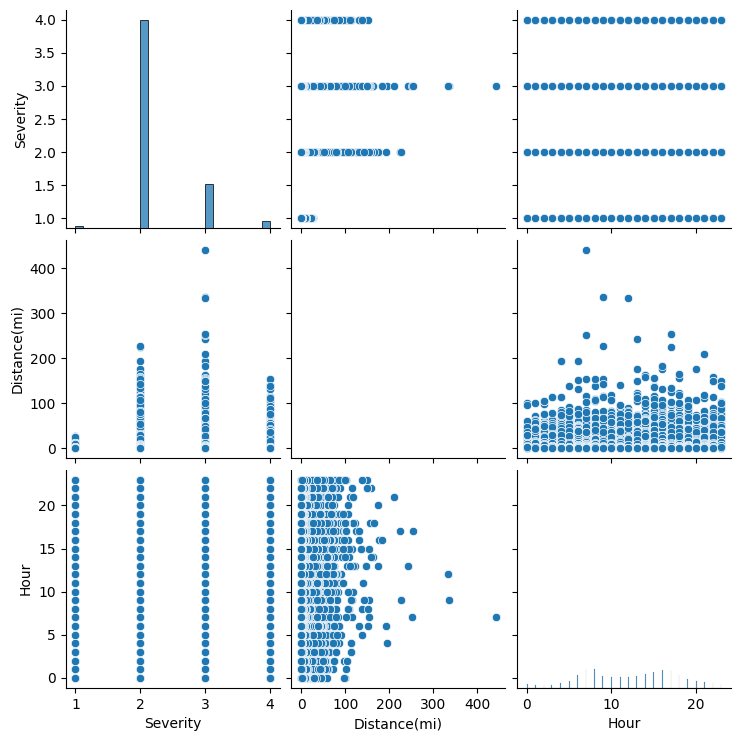

In [27]:
sns.pairplot(df_USA[['Severity', 'Distance(mi)', 'Hour']])
plt.show()